In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Country-data (1).csv")
df=data.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.set_index("country", inplace=True)

In [7]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.preprocessing import StandardScaler
df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns,index=df.index)

In [9]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


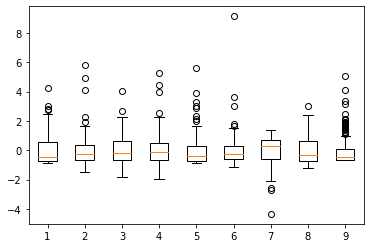

In [10]:
plt.boxplot(df);

In [11]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers
for i in df.columns:
    sample_outliers = detect_outliers_iqr(df[i])
    print("Outliers from IQR method: ", len(sample_outliers))


Outliers from IQR method:  4
Outliers from IQR method:  5
Outliers from IQR method:  2
Outliers from IQR method:  4
Outliers from IQR method:  8
Outliers from IQR method:  5
Outliers from IQR method:  3
Outliers from IQR method:  1
Outliers from IQR method:  25


In [12]:
df.shape

(167, 9)

In [13]:
def remove_outlier(df_in, col_name):
    data=df_in[col_name]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1 
    lwr_bound  = q1-1.5*IQR
    upr_bound= q3+1.5*IQR
    df_out = np.clip(data, lwr_bound, upr_bound)
    return df_out
a=[]
for i in df.columns:
    a.append(remove_outlier(df, i))
a=np.array(a)
a=pd.DataFrame(a.reshape(9,167).T,columns=df.columns,index=df.index)
a


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,-0.887138,-1.500192,-1.827827,-1.939940,-0.860326,-1.137852,-2.538282,-1.191250,-0.696801
Albania,-0.882164,-1.423682,-1.769403,-1.453794,-0.855591,-1.043915,-2.538282,-1.138246,-0.691547
Algeria,-0.882164,-1.328914,-1.685418,-1.379219,-0.852261,-0.918666,-2.538282,-1.124995,-0.691164
Angola,-0.877190,-1.177797,-1.590479,-1.288073,-0.849660,-0.874070,-2.092785,-1.111744,-0.690398
Antigua and Barbuda,-0.877190,-1.153648,-1.575873,-1.279787,-0.845810,-0.832036,-1.968722,-1.085242,-0.687607
...,...,...,...,...,...,...,...,...,...
Vanuatu,2.455480,1.886805,1.856536,2.241778,1.811776,1.554052,1.290735,2.194407,1.103542
Venezuela,2.601595,1.886805,1.856536,2.265600,1.811776,1.554052,1.290735,2.379922,1.103542
Vietnam,2.601595,1.886805,2.294716,2.265600,1.811776,1.554052,1.313292,2.386548,1.103542


<AxesSubplot:>

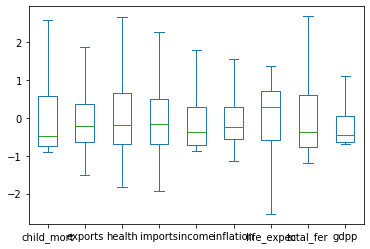

In [14]:
a.plot(kind="box")

In [15]:
from sklearn.cluster import KMeans

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.28735668921406704
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126
For n_clusters = 4 The average silhouette_score is : 0.3021082505899252
For n_clusters = 5 The average silhouette_score is : 0.22327899566511256
For n_clusters = 6 The average silhouette_score is : 0.23057357437984735
For n_clusters = 7 The average silhouette_score is : 0.25179867083491136
For n_clusters = 8 The average silhouette_score is : 0.222488864927923


In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit(df)

In [18]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [19]:
df_final=data.copy()

In [20]:
df_final["Kmeans cluster"]=kmeans.labels_

In [21]:
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [22]:
df_final["Kmeans cluster"].replace({0:"developed",1:"developing",2:"underdeveloped"},inplace=True)

In [23]:
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,developed


In [24]:
df_final["Kmeans cluster"].value_counts()

developing        84
developed         47
underdeveloped    36
Name: Kmeans cluster, dtype: int64

# part two

In [25]:
from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)

In [26]:
hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [27]:
df_final["Hierachical cluster"]=hc

In [28]:
df_final["Hierachical cluster"].replace({0:"developed",1:"developing",2:"underdeveloped"},inplace=True)

In [29]:
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans cluster,Hierachical cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,developed,underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,developed,developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing,developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing,developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing,developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,developed,developing


In [30]:
# import json
# from bs4 import BeautifulSoup
# import requests


In [31]:
# URL = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
# page = requests.get(URL)
# soup = BeautifulSoup(page.content, 'html.parser')

In [32]:
# country=pd.DataFrame(soup)

In [33]:
# country.to_json("countries.geojson")

In [34]:
# w_countries=json.load(open("countries.geojson","r"))

In [35]:
# set_id_map={}
# for i in w_countries["features"]:
#     i["id"]=i["properties"]["ISO_A3"]
#     set_id_map[i["properties"]["ADMIN"]]=i["id"]

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)

In [40]:
principalComponents

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01],
       [-1.12385093e+00, -9.61397405e-01,  5.26614801e-01],
       [ 1.08137420e+00, -4.81969530e-01, -6.64355198e-01],
       [ 5.80025152e-01,  5.35326834e-01,  4.86227511e-01],
       [ 3.14378596e+00,  6.63547921e-01, -6.45228094e-01],
       [ 2.11255447e-01,  6.99242662e-01

In [41]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["developed","developing","underdeveloped"])

In [42]:
principalDf

,developed,developing,underdeveloped
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


In [45]:
finalDf = pd.concat([principalDf, data[['country']]], axis = 1)

In [46]:
finalDf

,developed,developing,underdeveloped,country
0,-2.913025,0.095621,-0.718118,Afghanistan
1,0.429911,-0.588156,-0.333486,Albania
2,-0.285225,-0.455174,1.221505,Algeria
3,-2.932423,1.695555,1.525044,Angola
4,1.033576,0.136659,-0.225721,Antigua and Barbuda
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,Vanuatu
163,-0.551036,-1.233886,3.101350,Venezuela
164,0.498524,1.390744,-0.238526,Vietnam
165,-1.887451,-0.109453,1.109752,Yemen
